<a href="https://colab.research.google.com/github/DanielDiazLeivaDDL/DanielDiazLeivaDDL-challenge3-data-science-LATAM/blob/main/TelecomX2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
url = "https://raw.githubusercontent.com/DanielDiazLeivaDDL/DanielDiazLeivaDDL-challenge3-data-science-LATAM/main/df_limpio.csv"

import pandas as pd
datos = pd.read_csv(url)


datos.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesDaily
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#🔭Análisis Exploratorio

In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [3]:
for col in datos.columns:
    print(f'{col}: {pd.unique(datos[col])}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' nan]
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Ba

##Datos Categoricos

In [4]:
from enum import auto
import plotly.express as px

px.histogram(datos, x='Churn',text_auto=True)

In [5]:
px.histogram(datos, x='gender',text_auto=True)

In [6]:
px.histogram(datos, x='InternetService',text_auto=True, color='Churn', barmode='group')

In [7]:
px.histogram(datos, x='PaymentMethod',text_auto=True, color='Churn', barmode='group')

##Datos Numericos

In [8]:
px.box(datos, x='tenure', color='Churn')

In [9]:
px.box(datos, x='Charges.Monthly', color='Churn')

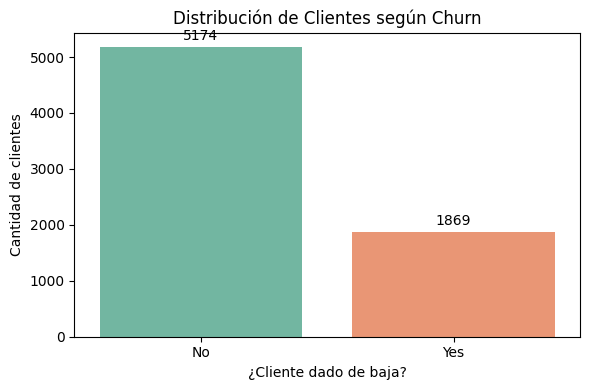

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=datos, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución de Clientes según Churn')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


##*Análisis Dirigido* : Tiempo de contrato × Cancelación - Gasto total × Cancelación



/tmp/ipython-input-2880494176.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




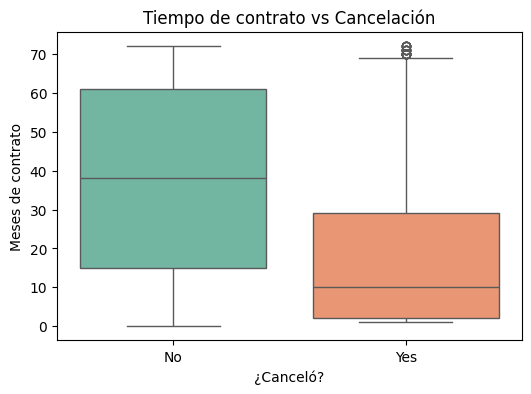

/tmp/ipython-input-2880494176.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




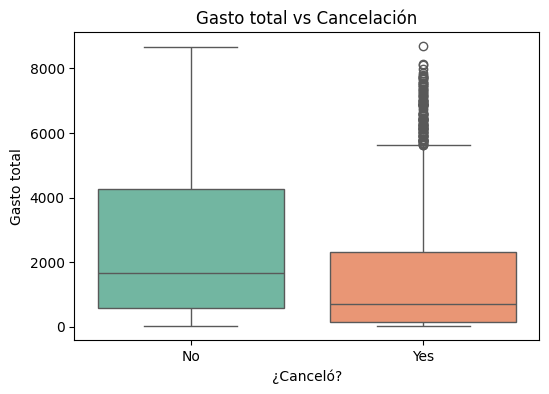

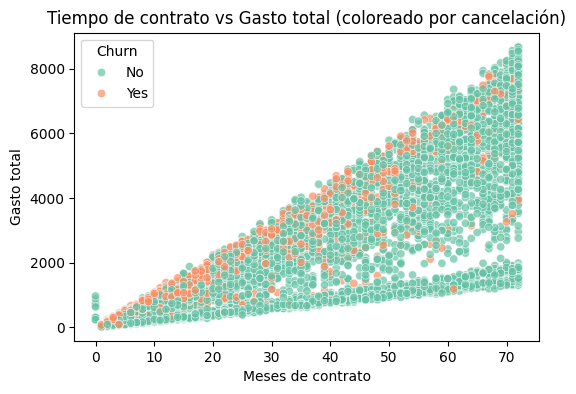

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


datos = datos.dropna(subset=["Churn"])
datos["Churn"] = datos["Churn"].str.strip()


plt.figure(figsize=(6,4))
sns.boxplot(data=datos, x="Churn", y="tenure", palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("¿Canceló?")
plt.ylabel("Meses de contrato")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(data=datos, x="Churn", y="Charges.Total", palette="Set2")
plt.title("Gasto total vs Cancelación")
plt.xlabel("¿Canceló?")
plt.ylabel("Gasto total")
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(data=datos, x="tenure", y="Charges.Total", hue="Churn", palette="Set2", alpha=0.7)
plt.title("Tiempo de contrato vs Gasto total (coloreado por cancelación)")
plt.xlabel("Meses de contrato")
plt.ylabel("Gasto total")
plt.show()



#🔧 Transformación

In [12]:
datos_nuevo = datos[datos['Churn'].notna()]
datos_nuevo = datos_nuevo.drop(['customerID'], axis=1)
datos_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  
 17  

In [13]:
datos_nuevo.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesDaily
0,No,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,No,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


##*Correlacion Churn y Tenure*

In [14]:
datos_corr = datos_nuevo


In [15]:

cols_categoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]


df_encoded = datos_corr.copy()


df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
df_encoded['gender'] = df_encoded['gender'].map({'Female': 0, 'Male': 1})


df_encoded = pd.get_dummies(df_encoded, columns=cols_categoricas, drop_first=True)


print(df_encoded.head())


corr_matrix = df_encoded.corr(numeric_only=True)
print(corr_matrix[['Churn', 'tenure']])



   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       0              0        1           1       9             1   
1      0       1              0        0           0       9             1   
2      1       1              0        0           0       4             1   
3      1       1              1        1           0      13             1   
4      1       0              1        1           0       3             1   

   PaperlessBilling  Charges.Monthly  Charges.Total  ...  TechSupport_Yes  \
0                 1             65.6         593.30  ...             True   
1                 0             59.9         542.40  ...            False   
2                 1             73.9         280.85  ...            False   
3                 1             98.0        1237.85  ...            False   
4                 1             83.9         267.40  ...             True   

   StreamingTV_No internet service  StreamingTV_Yes  \
0            

#*OneHotEncoder*

In [16]:
#se descartan los cargo anuales y diarios por ser redundantes, y comolos servicios se cobran mensualmente, es ma relevante mantener el mensual, dsarta gender por tener un correlacion muy baja ademas de que los servicios de telecumnicaciones no deben ni puedes discrimanr por genero
y = datos_nuevo['Churn']
X = datos_nuevo.drop(['Churn','ChargesDaily','Charges.Total','gender'], axis=1)
y = datos_nuevo['Churn']


In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [18]:
datos_nuevo.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'ChargesDaily'],
      dtype='object')

In [19]:
columnas = X.columns
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), [ 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']), remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

In [20]:
X = one_hot.fit_transform(X)

In [21]:
one_hot.get_feature_names_out(columnas)


array(['onehotencoder__SeniorCitizen_1', 'onehotencoder__Partner_1',
       'onehotencoder__Dependents_1', 'onehotencoder__PhoneService_1',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes'

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#🏗️Construccion de Modelos

#*Baseline*

In [23]:
from sklearn.model_selection import train_test_split

# 70% entrenamiento, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)



###*DUMMY*

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(dummy_clf.score(X_test, y_test))


0.73450070989115


#*Evaluacion modelo dummy*

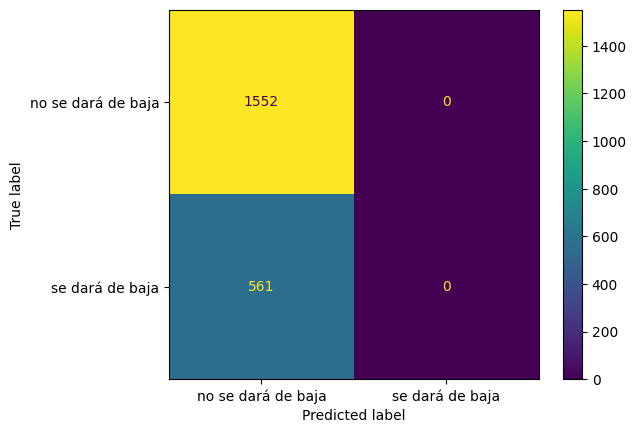

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_previsto = dummy_clf.predict(X_test)

matriz_confusion = confusion_matrix(y_test, y_previsto)

vis = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['no se dará de baja', 'se dará de baja']
)
vis.plot()


In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(precision_score(y_test,y_previsto))
print(recall_score(y_test,y_previsto))
print(accuracy_score(y_test,y_previsto))

print(f1_score(y_test,y_previsto))


0.0
0.0
0.73450070989115
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



#*Arbol de desciciones*

In [27]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=42,max_depth=10)
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [28]:
modelo_arbol.score(X_test, y_test)

0.7534311405584477

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [30]:
 valores_columnas =  [
    'gender_Male', 'SeniorCitizen_1', 'Partner_1', 'Dependents_1',
    'PhoneService_1', 'MultipleLines_No', 'MultipleLines_No phone service',
    'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service',
    'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service',
    'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service',
    'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
    'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service',
    'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaperlessBilling_1', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'tenure', 'Charges.Monthly', 'Charges.Total',
    'ChargesDaily'
]


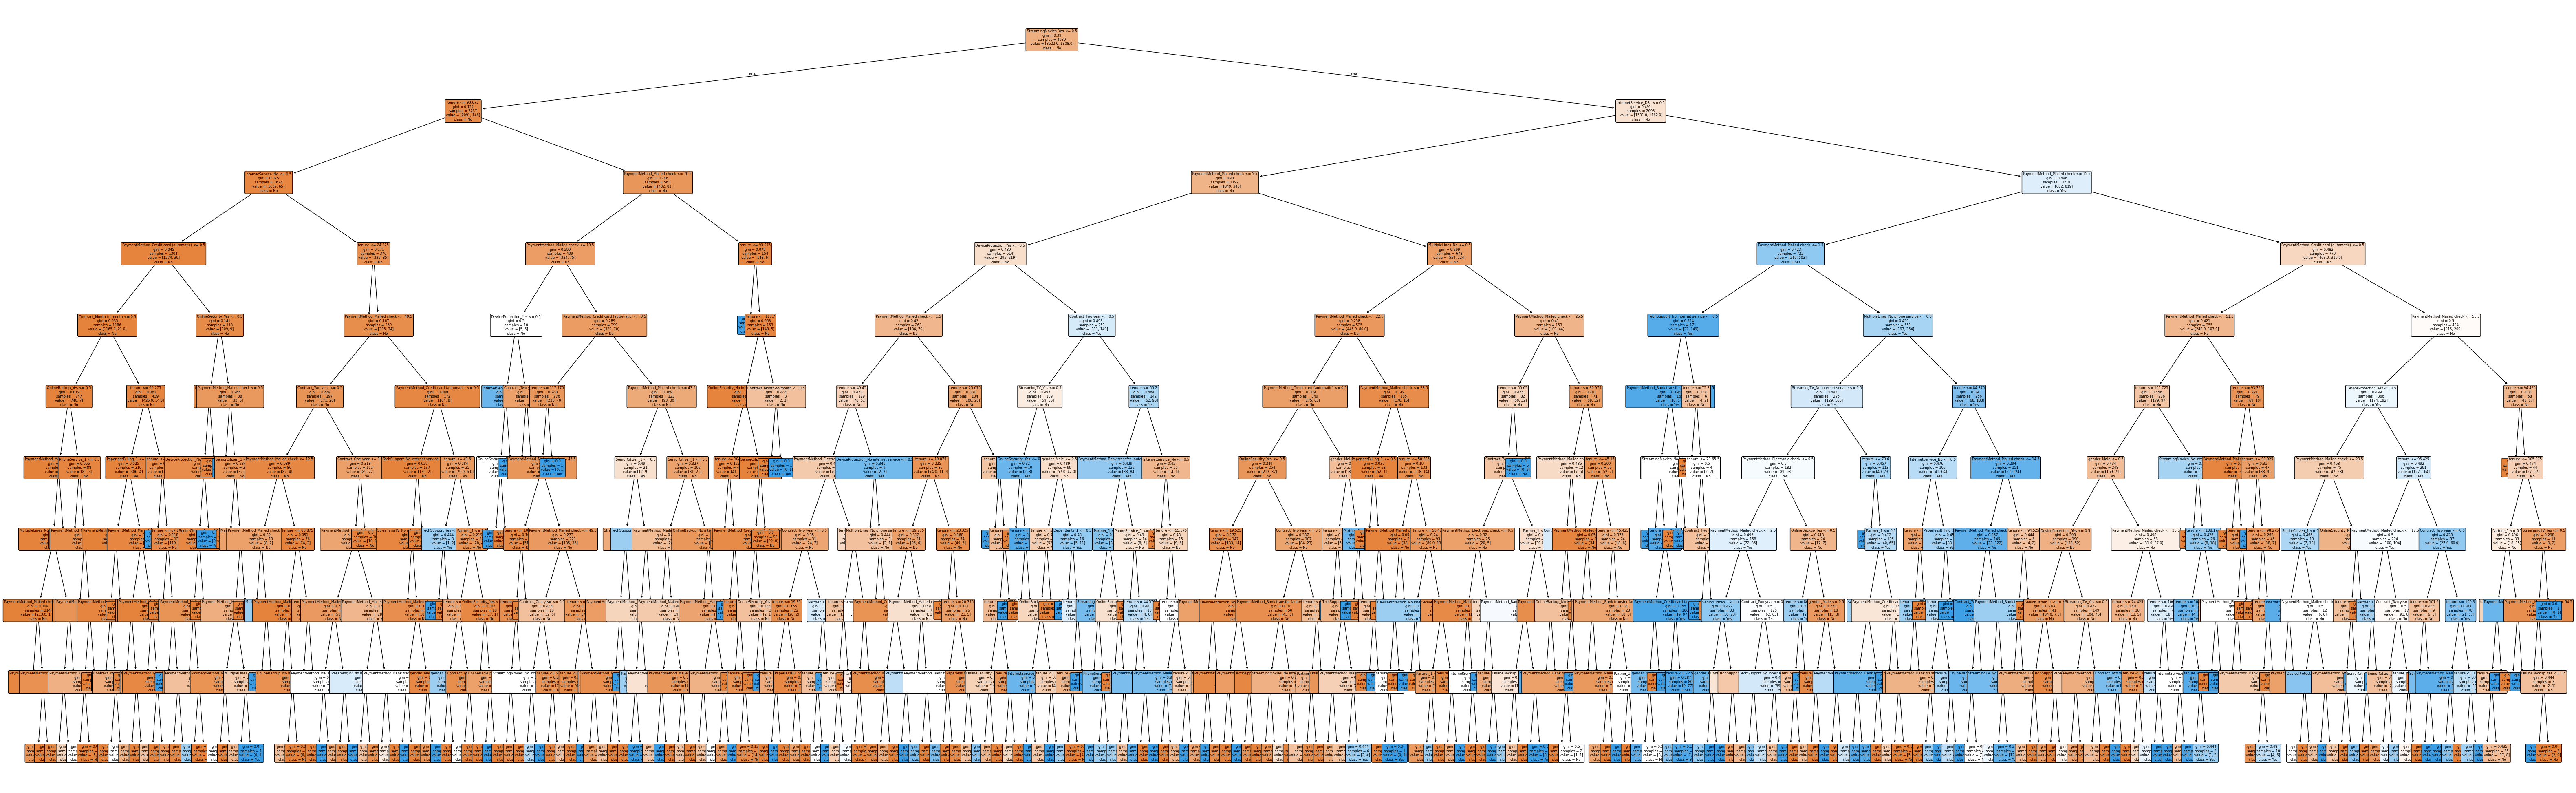

In [31]:
plt.figure(figsize=(80, 25))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'], fontsize=6, feature_names=valores_columnas, rounded=True)
plt.show()

##*Scoring preliminar*

In [32]:
modelo_arbol.score(X_train, y_train)

0.8716024340770792

In [33]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
modelo_arbol.score(X_train, y_train)

0.7922920892494929

In [35]:
modelo_arbol.score(X_test, y_test)

0.7884524372929484

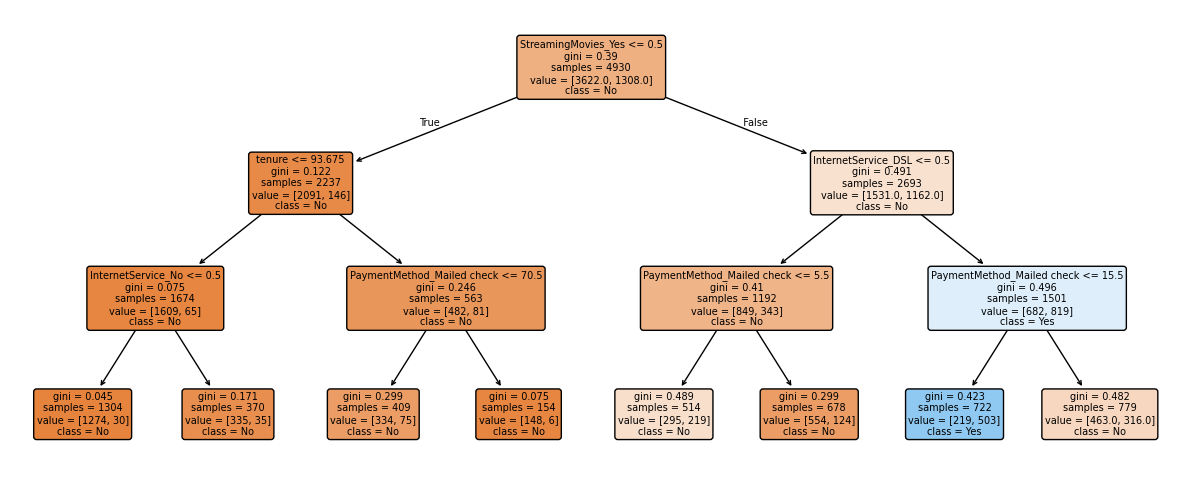

In [36]:
plt.figure(figsize=(15, 6))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'], fontsize=7, feature_names=valores_columnas, rounded=True)
plt.show()

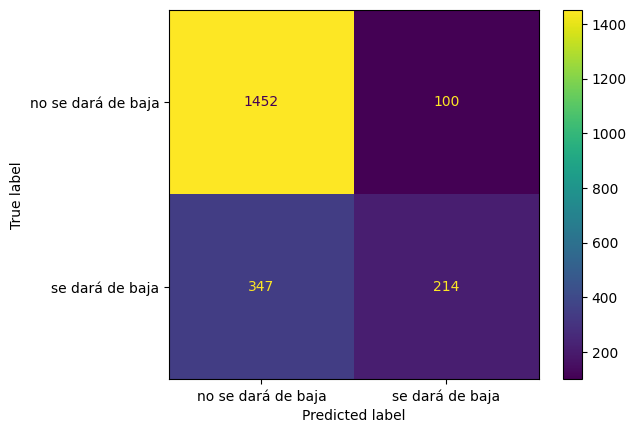

In [37]:

y_previsto = modelo_arbol.predict(X_test)
matriz_confusion = confusion_matrix(y_test,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

###*Evaluación del Modelo de Arbol*

In [38]:

print(f'Precision : {precision_score(y_test, y_previsto)}')
print(f'Recall    : {recall_score(y_test, y_previsto)}')
print(f'Accuracy  : {accuracy_score(y_test, y_previsto)}')
print(f'F1        : {f1_score(y_test, y_previsto)}')

Precision : 0.6815286624203821
Recall    : 0.38146167557932265
Accuracy  : 0.7884524372929484
F1        : 0.48914285714285716


In [39]:
from sklearn.metrics import roc_auc_score


y_proba = modelo_arbol.predict_proba(X_test)[:, 1]


print(f'Área bajo la curva ROC: {roc_auc_score(y_test, y_proba):.4f}')


Área bajo la curva ROC: 0.8144


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_previsto))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1552
           1       0.68      0.38      0.49       561

    accuracy                           0.79      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.79      0.77      2113



###*Validacion cruzada Estraitificada*

In [41]:

from sklearn.model_selection import  StratifiedKFold,KFold,cross_validate

modelo = DecisionTreeClassifier(max_depth=10, random_state=42)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(modelo,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.03402042, 0.02910089, 0.02553487, 0.02500558, 0.02487254]),
 'score_time': array([0.00487256, 0.00379848, 0.00300956, 0.00297046, 0.0029099 ]),
 'test_score': array([0.56417112, 0.53743316, 0.54010695, 0.57640751, 0.52673797])}

In [42]:
cv_resultados['test_score']

array([0.56417112, 0.53743316, 0.54010695, 0.57640751, 0.52673797])

In [43]:
def intervalo_confianza(res):
    promedio  = res['test_score'].mean()
    des_std   = res['test_score'].std()
    lim_inf   = promedio - 2*des_std
    lim_sup   = min(promedio + 2*des_std, 1)  # evita pasar de 1
    return f"El intervalo es: [{lim_inf:.3f}, {lim_sup:.3f}]"


intervalo_confianza(cv_resultados)



'El intervalo es: [0.512, 0.586]'

##*Balanceo de Datos*

###*OverSampling*

In [44]:
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=42)
x_balan,y_balan = OS.fit_resample(X,y)



In [45]:
import numpy as np

valores, cuentas = np.unique(y_balan, return_counts=True)
print("Valores:", valores)
print("Frecuencias:", cuentas)
print("Porcentajes:", cuentas / len(y_balan) * 100)


Valores: [0 1]
Frecuencias: [5174 5174]
Porcentajes: [50. 50.]


In [46]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(pipeline,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.07828546, 0.06838155, 0.07110953, 0.07250261, 0.07158852]),
 'score_time': array([0.00374699, 0.00361919, 0.00369906, 0.00375152, 0.00350094]),
 'test_score': array([0.5828877 , 0.59090909, 0.58823529, 0.57372654, 0.54545455])}

In [47]:
intervalo_confianza(cv_resultados)

'El intervalo es: [0.543, 0.609]'

###*UnderSampling*

In [48]:
from imblearn.under_sampling import NearMiss



In [49]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(pipeline,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.08376002, 0.08612156, 0.08288002, 0.09084582, 0.08418345]),
 'score_time': array([0.00378084, 0.00386572, 0.00369477, 0.00392652, 0.00390649]),
 'test_score': array([0.65508021, 0.56417112, 0.60695187, 0.60857909, 0.5828877 ])}

In [50]:
intervalo_confianza(cv_resultados)

'El intervalo es: [0.542, 0.665]'

##Scoring definitivo de Arbol

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1552
           1       0.64      0.68      0.66       561

    accuracy                           0.82      2113
   macro avg       0.76      0.77      0.77      2113
weighted avg       0.82      0.82      0.82      2113



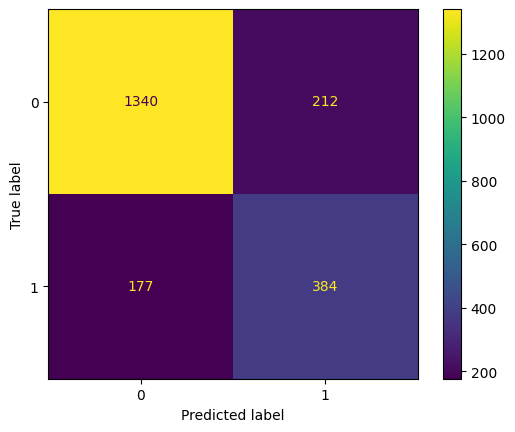

In [51]:
OS = SMOTE()
x_balan,y_balan = OS.fit_resample(X,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balan,y_balan)
y_previsto = modelo.predict(X_test)


print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);


#*Normalizacion*

In [52]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)


#*KNN*

In [53]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [54]:
X_test_norm = norm.transform(X_test)
modelo_knn.score(X_test_norm, y_test)

0.7610033128253668

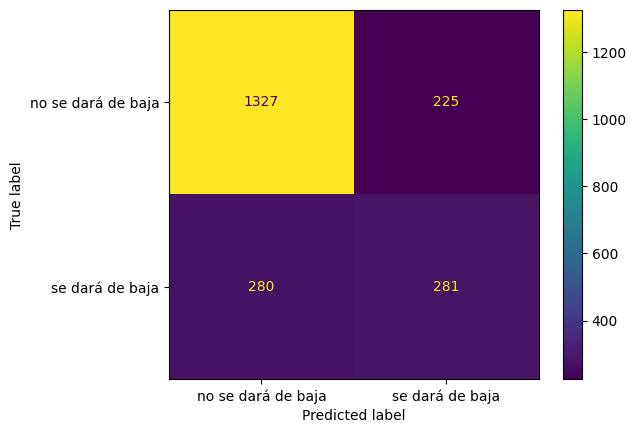

In [55]:

y_previsto = modelo_knn.predict(X_test_norm)
matriz_confusion = confusion_matrix(y_test,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

In [56]:

print(f'Precision : {precision_score(y_test, y_previsto)}')
print(f'Recall    : {recall_score(y_test, y_previsto)}')
print(f'Accuracy  : {accuracy_score(y_test, y_previsto)}')
print(f'F1        : {f1_score(y_test, y_previsto)}')

Precision : 0.5553359683794467
Recall    : 0.5008912655971479
Accuracy  : 0.7610033128253668
F1        : 0.5267104029990628


In [57]:
#Importo todo por uncuestion de comodidad, para no tener que ejecutar todo cada vez

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
import numpy as np

##*Validación cruzada estratificada sin muestreo*

In [58]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline_knn = imbpipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

cv_resultados = cross_validate(pipeline_knn, X_train, y_train, cv=skf, scoring='recall')

print(intervalo_confianza(cv_resultados))

El intervalo es: [0.476, 0.540]


In [59]:

print(intervalo_confianza(cv_resultados))

El intervalo es: [0.476, 0.540]


##*Balanceo con SMOTE (oversampling) + validación cruzada*

In [61]:
pipeline_smote = imbpipeline([
    ('scaler', MinMaxScaler()),
    ('oversample', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

cv_resultados_smote = cross_validate(pipeline_smote, X_train, y_train, cv=skf, scoring='recall')

print("Con SMOTE (oversampling):")
print(intervalo_confianza(cv_resultados_smote))

Con SMOTE (oversampling):
El intervalo es: [0.659, 0.743]


##*Balanceo con Undersampling + validación cruzada*

In [62]:
pipeline_under = imbpipeline([
    ('scaler', MinMaxScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('knn', KNeighborsClassifier())
])

cv_resultados_under = cross_validate(pipeline_under, X_train, y_train, cv=skf, scoring='recall')

print("Con Undersampling:")
print(intervalo_confianza(cv_resultados_under))

Con Undersampling:
El intervalo es: [0.741, 0.826]


##*Scoring Definitivo KNN*

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1552
           1       0.53      0.84      0.65       561

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113



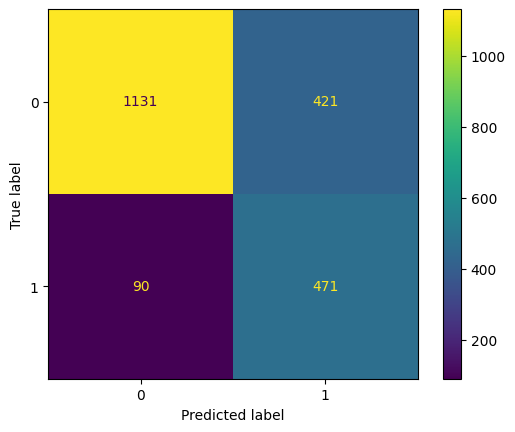

In [63]:
US = RandomUnderSampler()
x_reduc, y_reduc = US.fit_resample(X, y)


modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_reduc, y_reduc)

y_previsto = modelo_knn.predict(X_test)


print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

#*Modelo Campeon*

=== Árbol con SMOTE ===
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1552
           1       0.54      0.59      0.56       561

    accuracy                           0.76      2113
   macro avg       0.69      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113

Accuracy: 0.7572

=== KNN con Undersampling ===
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1552
           1       0.48      0.78      0.59       561

    accuracy                           0.71      2113
   macro avg       0.69      0.73      0.68      2113
weighted avg       0.78      0.71      0.73      2113

Accuracy: 0.7137

🏆 Modelo campeón: Árbol con SMOTE


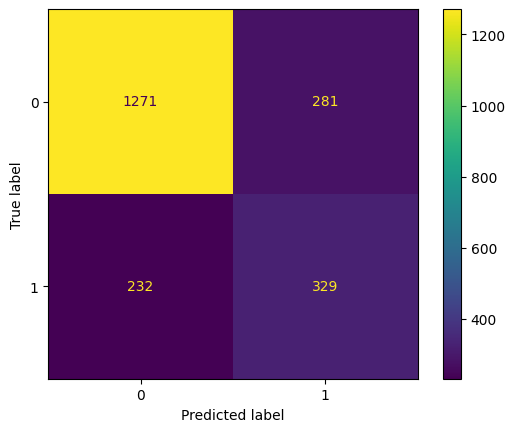

In [64]:


# Modelo Árbol con SMOTE
OS = SMOTE(random_state=42)
X_balan, y_balan = OS.fit_resample(X_train, y_train)
modelo_arbol = DecisionTreeClassifier(max_depth=10)
modelo_arbol.fit(X_balan, y_balan)
y_pred_arbol = modelo_arbol.predict(X_test)
acc_arbol = accuracy_score(y_test, y_pred_arbol)
print("=== Árbol con SMOTE ===")
print(classification_report(y_test, y_pred_arbol))
print(f"Accuracy: {acc_arbol:.4f}")

# Modelo KNN con Undersampling
US = RandomUnderSampler(random_state=42)
X_under, y_under = US.fit_resample(X_train, y_train)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_under, y_under)
y_pred_knn = modelo_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("\n=== KNN con Undersampling ===")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {acc_knn:.4f}")

# Elección del campeón según accuracy
if acc_arbol > acc_knn:
    print("\n🏆 Modelo campeón: Árbol con SMOTE")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arbol)
else:
    print("\n🏆 Modelo campeón: KNN con Undersampling")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)


In [65]:
import pickle

with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [66]:
with open('modelo_campeon.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [67]:


nuevo_cliente = pd.DataFrame([{
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'PhoneService': 1,
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 1,
    'PaymentMethod': 'Electronic check',
    'tenure': 5,
    'Charges.Monthly': 79.5,
    'Charges.Total': 397.5,
    'ChargesDaily': 2.65
}])
nuevo_cliente

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,Charges.Monthly,Charges.Total,ChargesDaily
0,Male,0,1,0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,5,79.5,397.5,2.65


In [68]:
modelo_one_hot = pd.read_pickle('modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('modelo_campeon.pkl')

In [69]:
nuevo_cliente = modelo_one_hot.transform(nuevo_cliente)

In [70]:
modelo_arbol.predict(nuevo_cliente)

array([1])

In [71]:
modelo_arbol.predict_proba(nuevo_cliente)

array([[0.12737921, 0.87262079]])

#📄Informe final

# Informe: Análisis de factores asociados a la cancelación (Churn) y recomendaciones de retención

>
> **Objetivo:** identificar los factores más relacionados con la cancelación y proponer acciones de retención, apoyadas en los modelos entrenados (Árbol con SMOTE y KNN con Undersampling).

---

## 1) Resumen ejecutivo

- **Factores asociados a mayor churn**:  
  `InternetService = Fiber optic`, `PaymentMethod = Electronic check`, `Charges.Monthly` / `ChargesDaily`, `PaperlessBilling`.
- **Factores asociados a menor churn**:  
  `Charges.Total` (acumulado), `InternetService = No`, `OnlineSecurity = Yes`, `Partner`, `Dependents`.
- **Tenure** (meses con la empresa) correlaciona **negativamente** con churn.
- **Modelos evaluados**:
  - Árbol con SMOTE: **Accuracy** ≈ 0.757, **Recall clase 1** ≈ 0.59, **Precision clase 1** ≈ 0.54.
  - KNN con Undersampling: **Accuracy** ≈ 0.714, **Recall clase 1** ≈ 0.78, **Precision clase 1** ≈ 0.48.

**Conclusión:**  
- Si se prioriza **recall** (detectar más churners) → **KNN con undersampling**.  
- Si se prioriza **precision** y **accuracy** → **Árbol con SMOTE**.

---

## 2) Metodología

- **Preprocesamiento**:  
  Limpieza de `Churn` (NaNs eliminados), one-hot encoding para variables categóricas, conservación de `Charges.Monthly`, descarte de variables redundantes.
- **División de datos**: 70% entrenamiento, 30% test, estratificado.
- **Modelos evaluados**:
  - Decision Tree con **SMOTE**.
  - KNN con **Undersampling**.
- **Métricas**: recall clase 1, precision, F1, accuracy, validación cruzada estratificada.

---

## 3) Hallazgos cuantitativos

### 3.1 Correlaciones con Churn

- `InternetService_Fiber optic`: **+0.308**
- `PaymentMethod_Electronic check`: **+0.302**
- `Charges.Monthly` / `ChargesDaily`: ≈ **+0.193**
- `PaperlessBilling`: **+0.192**
- `SeniorCitizen`: **+0.151**
- `Charges.Total`: **−0.199**
- `OnlineSecurity_Yes`: **−0.171**
- `Partner` y `Dependents`: correlaciones negativas moderadas.

**Interpretación clave**:
- Gastos mensuales altos = más churn.  
- Gastos acumulados altos = menos churn (efecto tenure).  
- `Fiber optic` y `Electronic check` son grupos de alto riesgo.

### 3.2 Tenure y gasto

- Clientes con menor tenure presentan mayor churn.
- Clientes nuevos con cargos mensuales altos abandonan más rápido.

---

## 4) Comparación de modelos

| Modelo               | Accuracy | Precision (clase 1) | Recall (clase 1) | F1 (clase 1) |
|----------------------|---------:|--------------------:|-----------------:|-------------:|
| Árbol (SMOTE)        | 0.7572   | 0.54                | 0.59             | 0.56         |
| KNN (Undersampling)  | 0.7137   | 0.48                | **0.78**         | **0.59**     |

- KNN → más recall, más falsos positivos.  
- Árbol → más precision y accuracy, más conservador.

---

## 5) Estrategias de retención

### 5.1 Alta prioridad
1. **Clientes “Month-to-month” y tenure corto** → contrato largo con beneficios.
2. **Usuarios con Electronic check y/o alto cargo mensual** → incentivar cambio de método de pago.
3. **Clientes con Fiber optic** → revisar calidad de servicio y ofrecer bundles.

### 5.2 Prioridad media
4. **Bundles de servicios** (`OnlineSecurity`, `DeviceProtection`) para retención.
5. **Incentivar pago automático** con beneficios.

### 5.3 Operativo
6. **Onboarding y cuidado en primeros 3 meses**.
7. **Campañas basadas en probabilidad** de churn.

---

## 6) Guía técnica de despliegue

1. Elegir modelo según KPI (recall o precision).
2. Pipeline de preprocesamiento igual al de entrenamiento.
3. No aplicar SMOTE/undersampling en predicción.
4. Guardar modelo y transformaciones.


---

## 7) KPIs

- Reducción de churn absoluto.
- Lift en retención.
- Costo por cliente retenido.
- Precision y recall del modelo en producción.

---

## 8) Limitaciones y próximos pasos

- Correlación no implica causalidad.
- Revisar impacto de datos faltantes.


---

## 9) Plan de acción

**Corto plazo (1–2 semanas)**:  
- Lista top-risk con KNN y campaña piloto a Month-to-month + Electronic check + Fiber.

**Medio plazo (1–2 meses)**:  
- Implementar bundles para nuevos clientes.  
- Ajustar pipeline y umbrales.

**Largo plazo (3–6 meses)**:  

- Seguimiento automatizado y reentrenamiento.

---
